# Project Title : Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

## Importing the libraries

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
import klib
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

In [25]:
data = pd.read_csv('termdeposit_train.csv')##file path reading csv upload
data.sample(n=6)

ID  age          job  marital  education default  balance housing  \
26424  44000   30  blue-collar   single    primary      no      185      no   
207    15581   32   technician   single  secondary      no      648      no   
2354   18256   39       admin.  married  secondary      no       70     yes   
7683   40643   47   management   single   tertiary      no       86      no   
15837  14281   58  blue-collar  married    primary      no      226     yes   
17212  25714   32  blue-collar   single  secondary      no      413     yes   

      loan   contact  day month  duration  campaign  pdays  previous poutcome  \
26424   no   unknown   26   jun        11         1     -1         0  unknown   
207    yes  cellular   21   jul       166         1     -1         0  unknown   
2354    no  cellular   31   jul        13        11     -1         0  unknown   
7683    no  cellular    5   aug       253         1     97         4  success   
15837   no  cellular   14   jul       306         2     -1         0  unknown   
17212   no  cellular   19   nov       270         1     -1         0  unknown   

      subscribed  
26424         no  
207           no  
2354          no  
7683         yes  
15837         no  
17212         no

In [26]:
data_test = pd.read_csv('termdeposit_test.csv')##file path reading csv upload
data_test.sample(n=6)

ID  age            job  marital  education default  balance housing  \
9254   39189   30     technician   single  secondary      no      778     yes   
7185    9621   36    blue-collar  married    primary      no        0      no   
10842  39543   30     management   single   tertiary      no      320      no   
4949    2446   49  self-employed  married   tertiary      no     2199     yes   
3390   13097   25       services   single  secondary      no        2      no   
10339  31990   41         admin.  married  secondary      no     5110     yes   

      loan   contact  day month  duration  campaign  pdays  previous poutcome  
9254    no  cellular   18   may        22         2    346         2  failure  
7185    no   unknown    6   jun       149         1     -1         0  unknown  
10842   no  cellular   26   may       140         1     -1         0  unknown  
4949    no   unknown   13   may        98         1     -1         0  unknown  
3390    no  cellular    8   jul       288         1     -1         0  unknown  
10339   no  cellular   13   apr       231         1     -1         0  unknown

## EDA

In [27]:
data.head()

ID  age         job   marital  education default  balance housing loan  \
0  26110   56      admin.   married    unknown      no     1933      no   no   
1  40576   31     unknown   married  secondary      no        3      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4         no

In [28]:
data.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [29]:
#Checking shape of data.
print("Rows - ", data.shape[0])
print("Columns - ", data.shape[1])

Rows -  31647
Columns -  18


### Checking null and duplicates value

In [30]:
data.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [31]:
data.duplicated().sum()

0

### So we don't have any null or duplicate values.

In [32]:
# Describing data 
data.describe(include='all')#.transpose()

ID           age          job  marital  education default  \
count   31647.000000  31647.000000        31647    31647      31647   31647   
unique           NaN           NaN           12        3          4       2   
top              NaN           NaN  blue-collar  married  secondary      no   
freq             NaN           NaN         6842    19095      16224   31062   
mean    22563.972162     40.957247          NaN      NaN        NaN     NaN   
std     13075.936990     10.625134          NaN      NaN        NaN     NaN   
min         2.000000     18.000000          NaN      NaN        NaN     NaN   
25%     11218.000000     33.000000          NaN      NaN        NaN     NaN   
50%     22519.000000     39.000000          NaN      NaN        NaN     NaN   
75%     33879.500000     48.000000          NaN      NaN        NaN     NaN   
max     45211.000000     95.000000          NaN      NaN        NaN     NaN   

              balance housing   loan   contact           day  month  \
count    31647.000000   31647  31647     31647  31647.000000  31647   
unique            NaN       2      2         3           NaN     12   
top               NaN     yes     no  cellular           NaN    may   
freq              NaN   17584  26516     20423           NaN   9669   
mean      1363.890258     NaN    NaN       NaN     15.835466    NaN   
std       3028.304293     NaN    NaN       NaN      8.337097    NaN   
min      -8019.000000     NaN    NaN       NaN      1.000000    NaN   
25%         73.000000     NaN    NaN       NaN      8.000000    NaN   
50%        450.000000     NaN    NaN       NaN     16.000000    NaN   
75%       1431.000000     NaN    NaN       NaN     21.000000    NaN   
max     102127.000000     NaN    NaN       NaN     31.000000    NaN   

            duration      campaign         pdays      previous poutcome  \
count   31647.000000  31647.000000  31647.000000  31647.000000    31647   
unique           NaN           NaN           NaN           NaN        4   
top              NaN           NaN           NaN           NaN  unknown   
freq             NaN           NaN           NaN           NaN    25929   
mean      258.113534      2.765697     39.576042      0.574272      NaN   
std       257.118973      3.113830     99.317592      2.422529      NaN   
min         0.000000      1.000000     -1.000000      0.000000      NaN   
25%       104.000000      1.000000     -1.000000      0.000000      NaN   
50%       180.000000      2.000000     -1.000000      0.000000      NaN   
75%       318.500000      3.000000     -1.000000      0.000000      NaN   
max      4918.000000     63.000000    871.000000    275.000000      NaN   

       subscribed  
count       31647  
unique          2  
top            no  
freq        27932  
mean          NaN  
std           NaN  
min           NaN  
25%           NaN  
50%           NaN  
75%           NaN  
max           NaN

In [33]:
#checking info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='previous', ylabel='Density'>

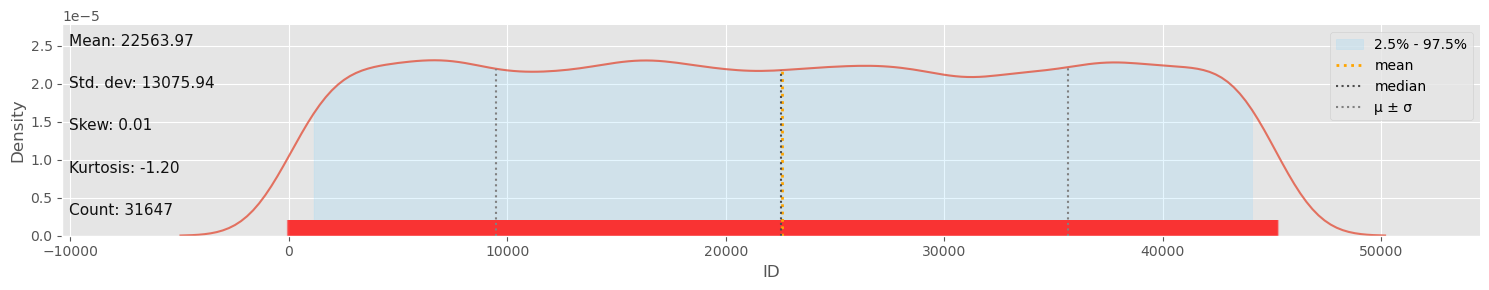

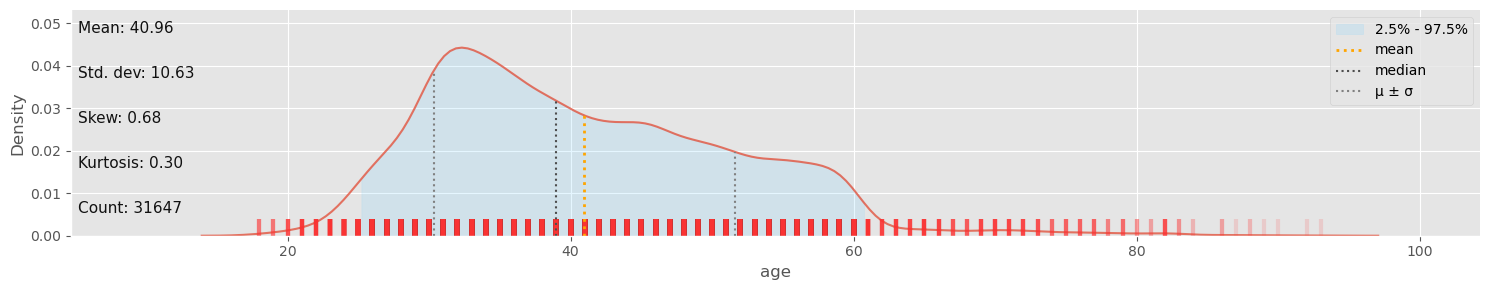

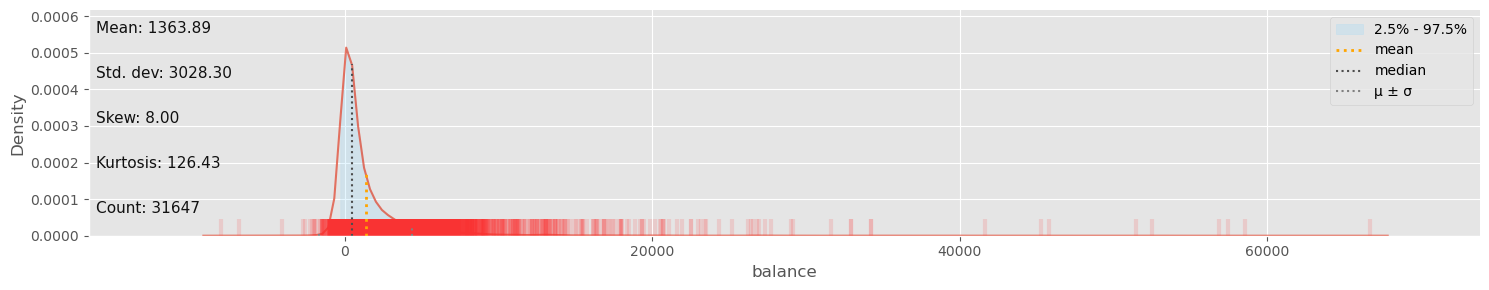

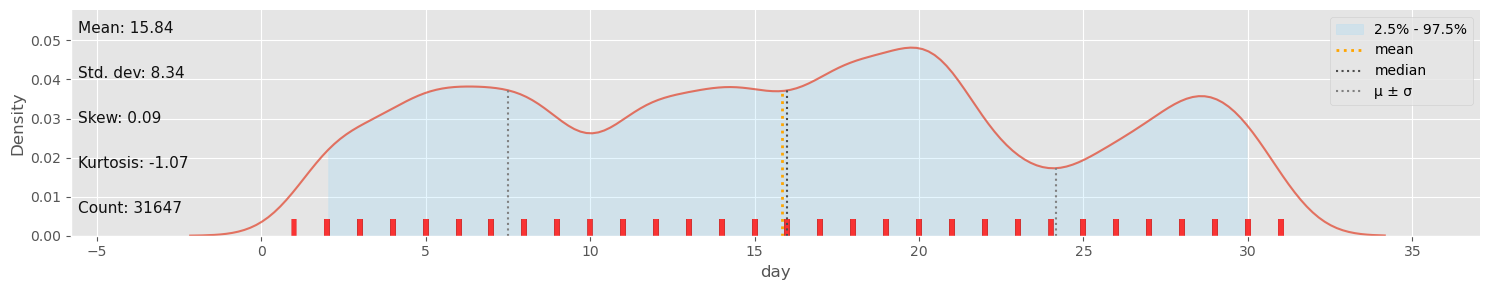

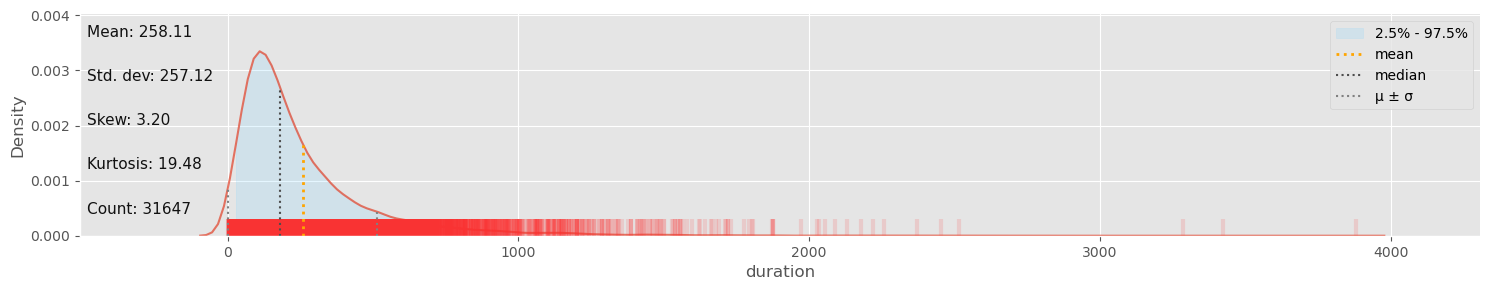

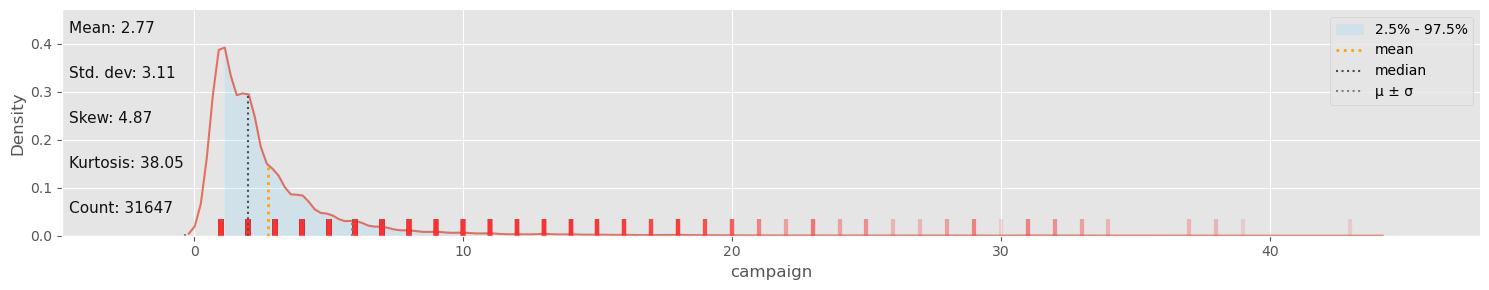

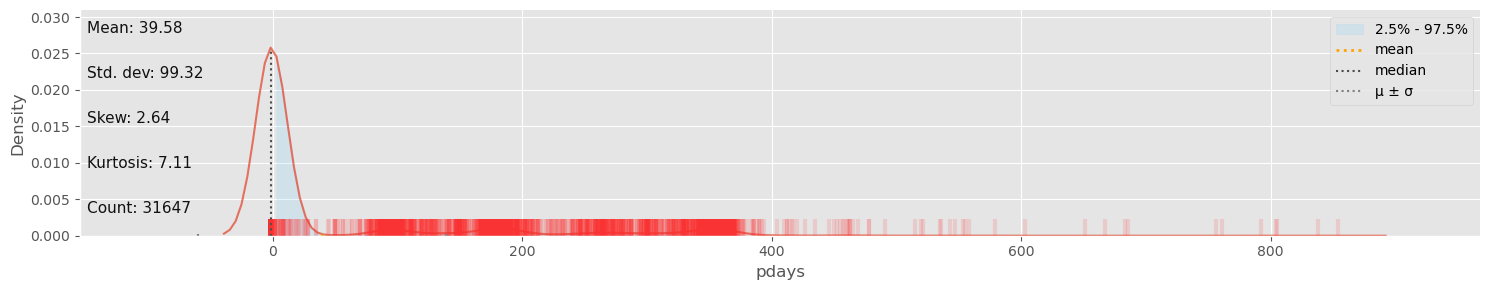

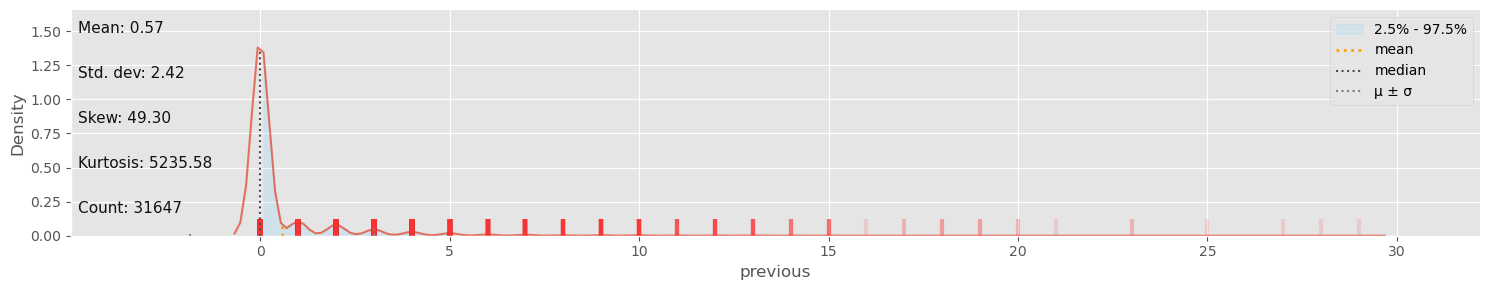

In [39]:
# distribution plot
klib.dist_plot(data)

### So from above graphs we conclude that some columns have outliers which should be removed.

## Categorical columns

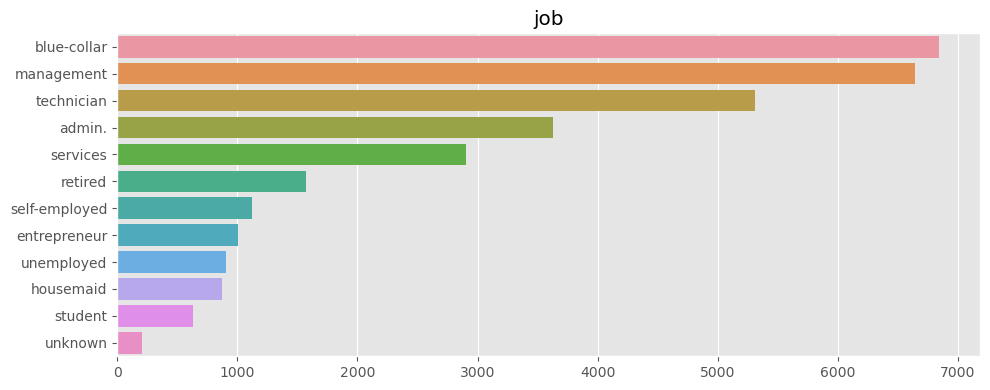

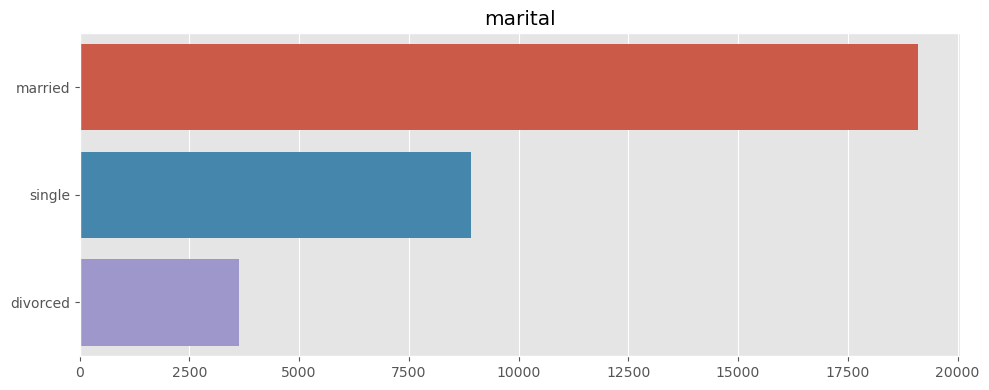

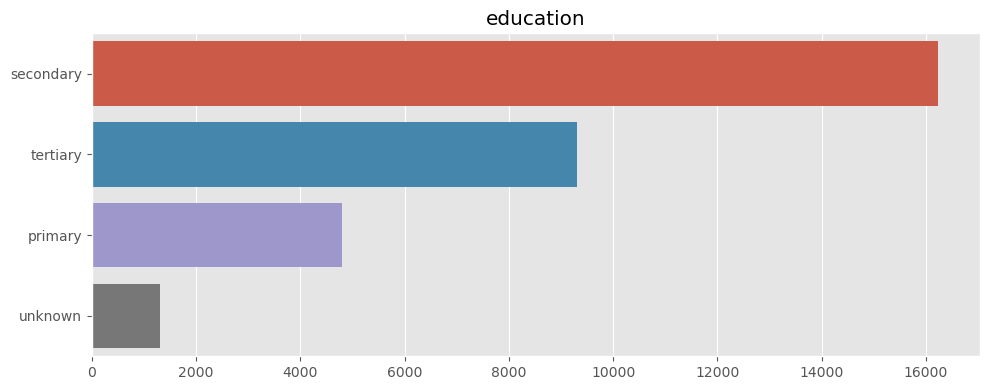

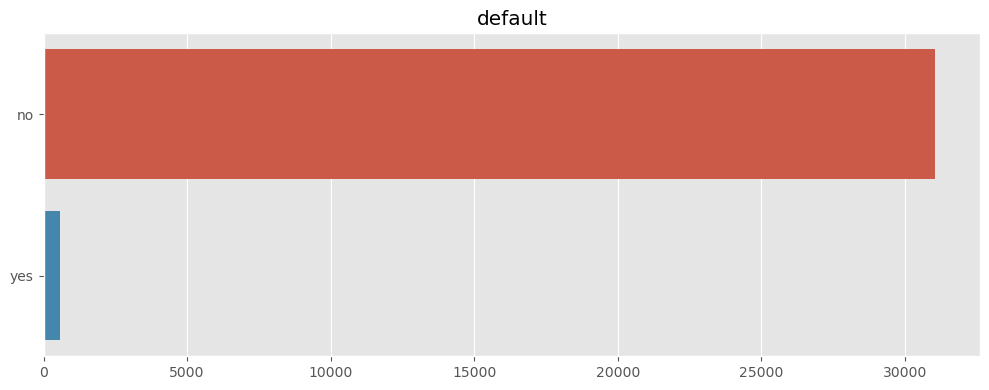

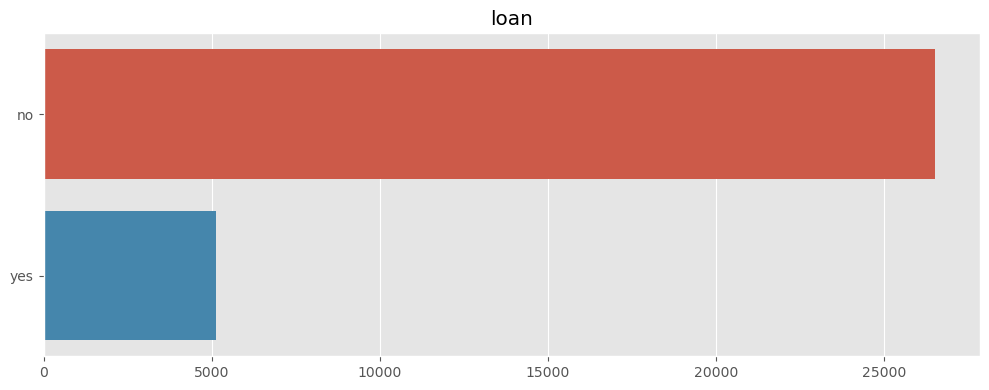

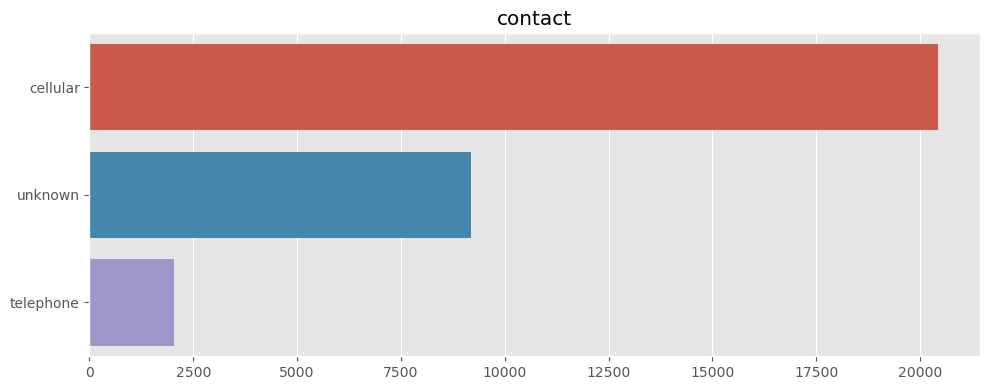

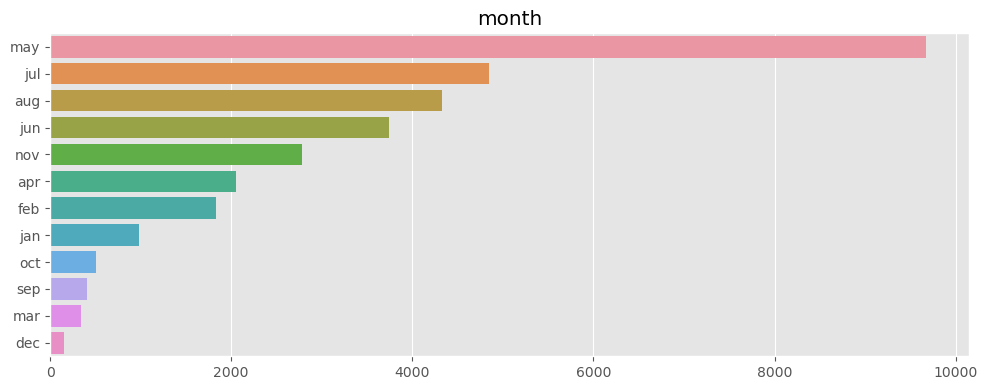

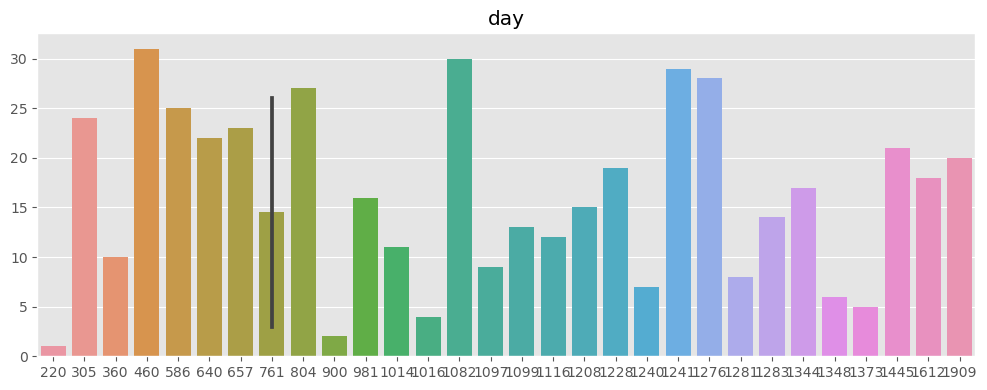

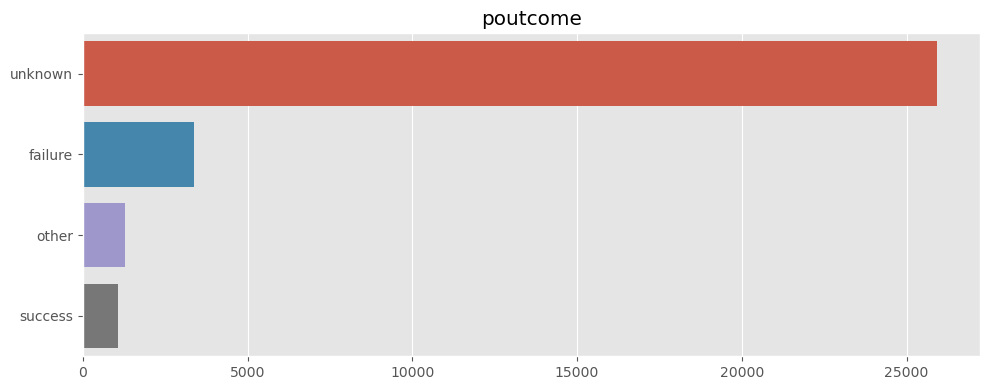

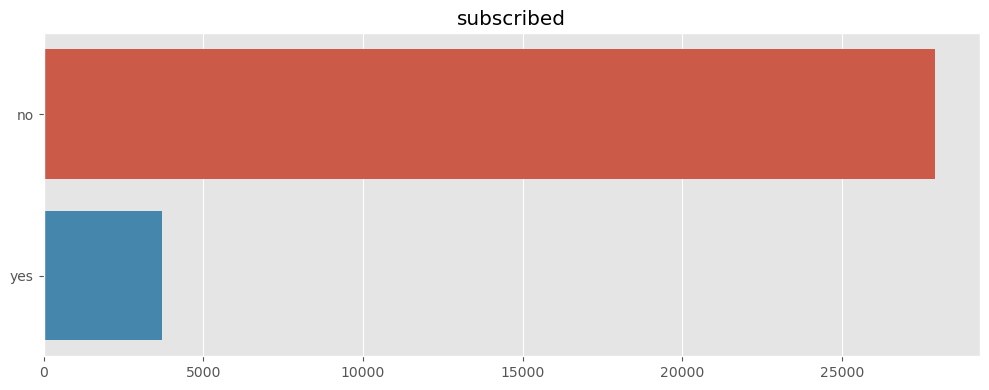

In [41]:
categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day', 'poutcome','subscribed']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(data[col].value_counts().values, data[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

### Analysis All Columns With Target variable

### 1.Age

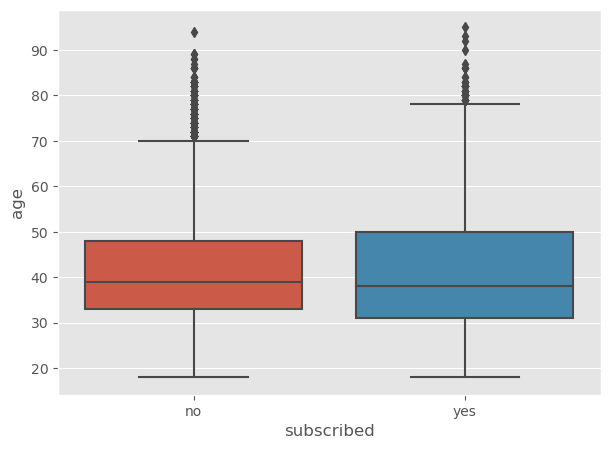

In [50]:
# Plotting the box plot 
plt.figure(figsize=(7,5))
sns.boxplot(y='age',x="subscribed", data= data)
plt.show()


### Observation- From above plot it is clear that a majority of customers called is in the age of 30s to 40s.

### 2.Job

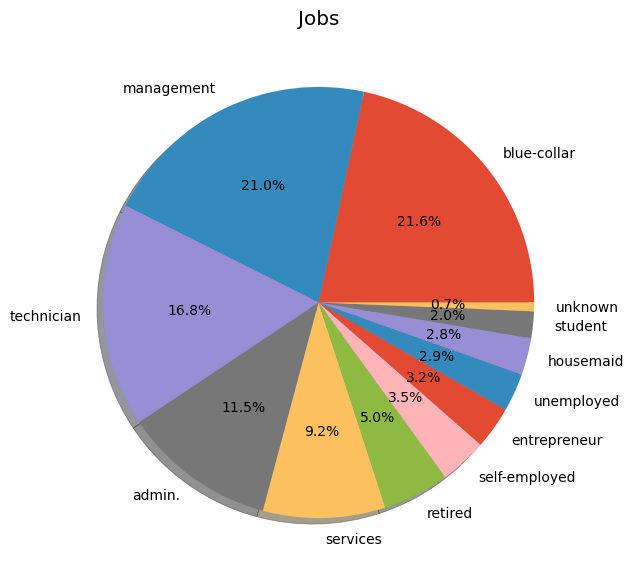

In [51]:
#pie plot of job 
plt.figure(figsize=(7,7))
plt.pie(data.job.value_counts(),labels=data.job.value_counts().index,shadow = True,autopct='%1.1f%%')
plt.title('Jobs')
plt.show()

In [52]:
data.job.value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

<AxesSubplot:xlabel='job', ylabel='count'>

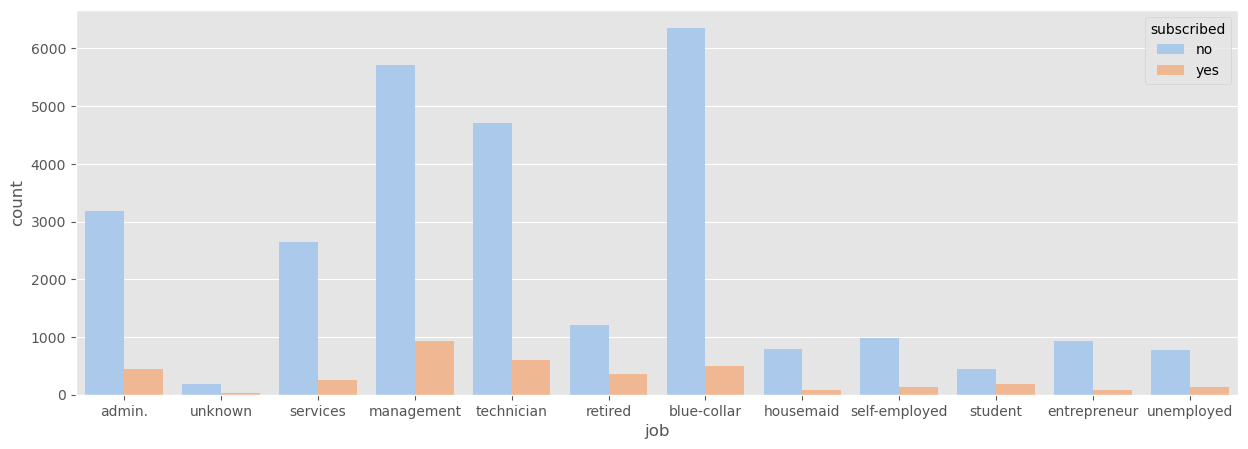

In [54]:
#Lets explore the count of accept and reject term deposit on the basis of different type of job 
fig, ax = plt.subplots(figsize=(15,5))
#sns.countplot(data.job, ax=ax, palette='pastel')
sns.countplot(data.job, hue=data.subscribed,ax=ax, palette='pastel')

### Observation - Blue-collar, management and technician showed maximum interest in subscription.

### 3. Martial status

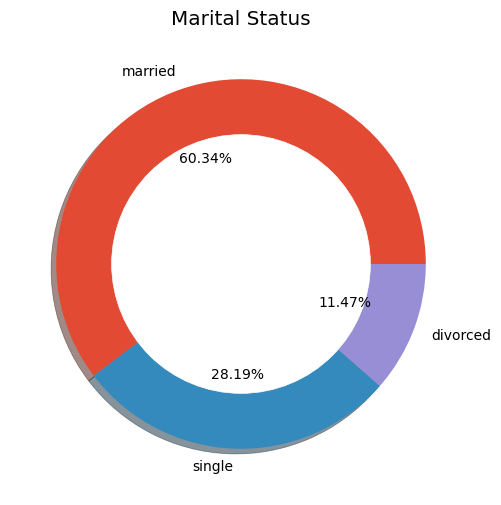

In [55]:
#Lets see pie plot of Martial status 
plt.figure(figsize=(6,6))
plt.pie(data.marital.value_counts(),labels=data.marital.value_counts().index,autopct='%1.2f%%',shadow = True)

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Marital Status')
plt.show()

In [56]:
data.marital.value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

Text(0.5, 1.0, 'Count of yes and no for different category of marital status')

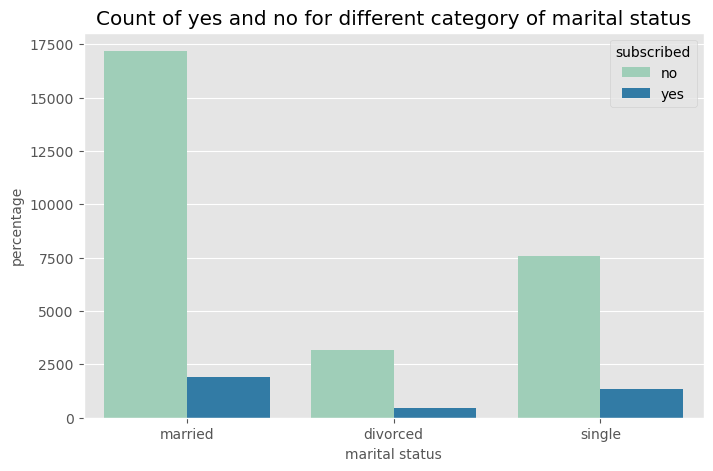

In [58]:
#Lets explore the count of accept and reject term deposit on the basis of different type of marital status
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(data.marital, hue=data.subscribed,ax=ax, palette='YlGnBu')
plt.xlabel('marital status',fontsize=10)
plt.ylabel('percentage',fontsize=10)
plt.title('Count of yes and no for different category of marital status')

### Observation - Married and Single have more intrest in subscribed.

### 4.Education

Text(0.5, 1.0, 'Count of yes and no for different education level')

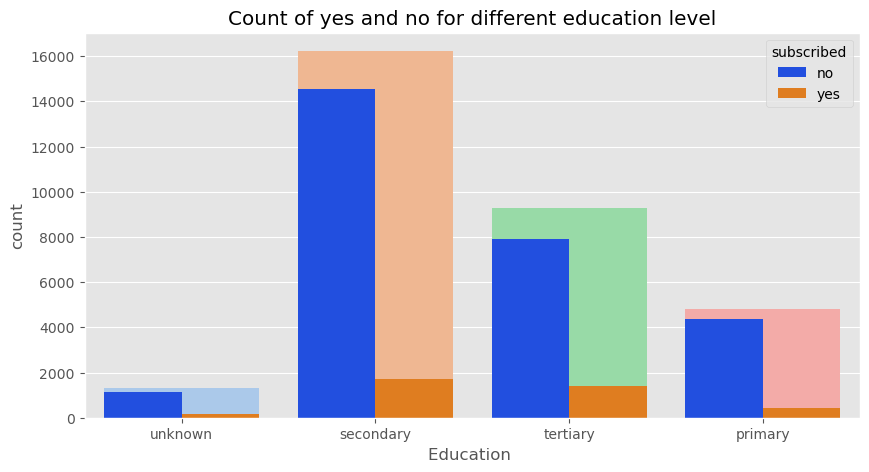

In [59]:
# deposit term on the basis of different type of educated person
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data.education, ax=ax, palette='pastel')
sns.countplot(data.education, hue=data.subscribed,ax=ax, palette='bright')
plt.xlabel('Education ')
plt.title('Count of yes and no for different education level')

### Observation - People with secondary and tertiary education were more driven towards paying term subscribed in bank as comparison to primary, tertiary and some unknown education.

### 5.Default

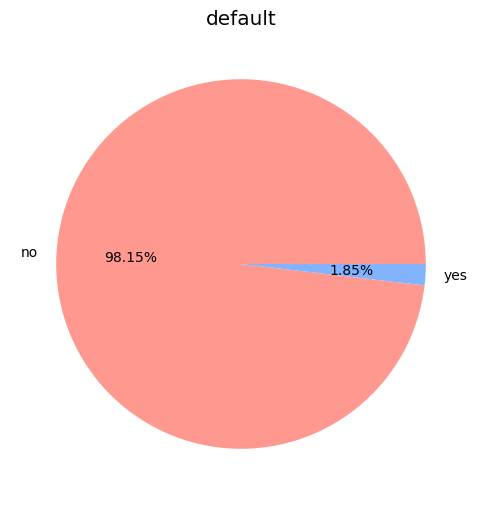

In [60]:
#Lets see pie plot of default 
plt.figure(figsize=(6,6))
colors = ['#ff9990','#81b3ff']
plt.pie(data.default.value_counts(),labels=data.default.value_counts().index,autopct='%1.2f%%',colors=colors)

plt.title('default')
plt.show()

Text(0.5, 1.0, 'Count of yes and no for default category')

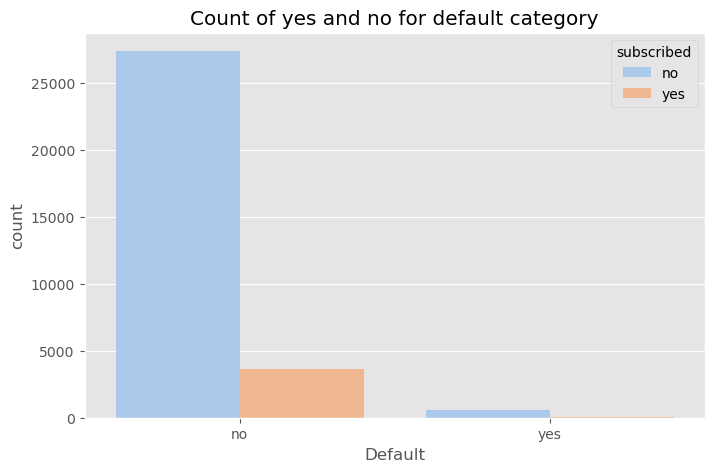

In [61]:
#Lets explore the count of accept and reject term deposit on the basis of different type of educated person
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(data.default, hue=data.subscribed,ax=ax, palette='pastel')
plt.xlabel('Default')
plt.title('Count of yes and no for default category')

### Observation - Genrally people don't have credit in default.

### 6.Housing Loan

Text(0.5, 1.0, 'Count of yes and no for house loan category')

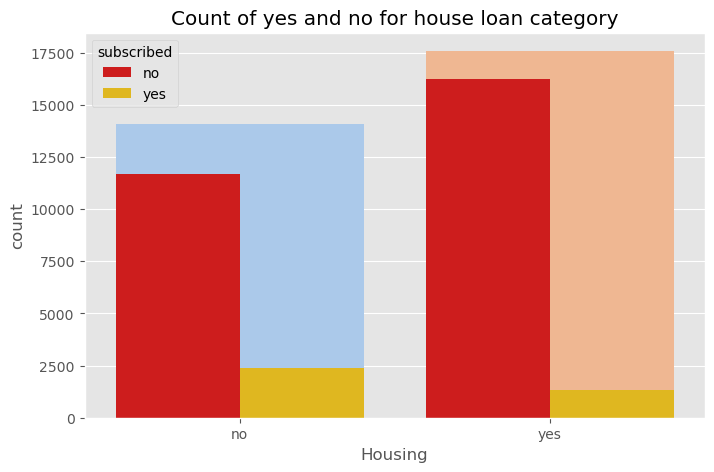

In [62]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(data.housing, ax=ax, palette='pastel')
sns.countplot(data.housing, hue=data.subscribed,ax=ax, palette='hot')
plt.xlabel('Housing')
plt.title('Count of yes and no for house loan category')

### Observation - Most of the people have home loan but only few of them opted for term subscribed.

### 7.Personal Loan

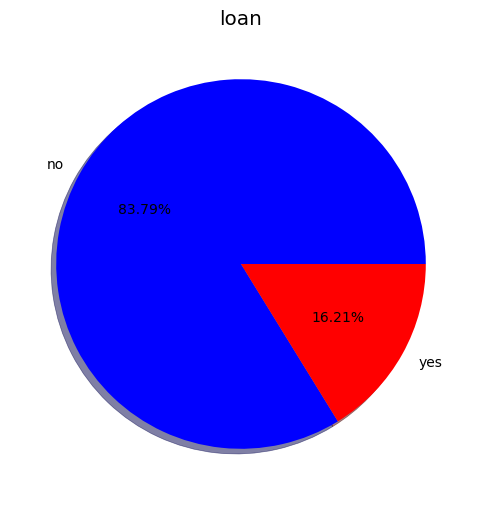

In [63]:
#Lets see pie plot for loan
plt.figure(figsize=(6,6))
plt.pie(data.loan.value_counts(),labels=data.loan.value_counts().index,autopct='%1.2f%%',shadow= True, colors='bright')
plt.title('loan')
plt.show()

Text(0.5, 1.0, 'Count of yes and no for personal loan category')

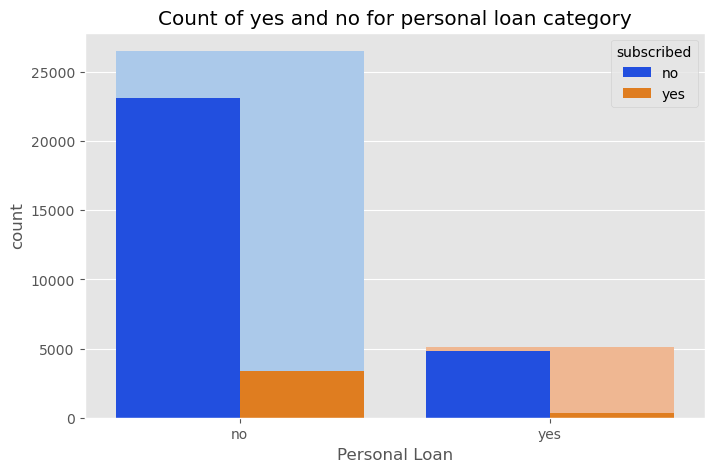

In [64]:
#Lets explore the count of accept and reject term deposit on the basis of different type of educated person
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(data.loan, ax=ax, palette='pastel')
sns.countplot(data.loan, hue=data.subscribed,ax=ax, palette='bright')
plt.xlabel('Personal Loan')
plt.title('Count of yes and no for personal loan category')

### Observation - Majority of the people have not personal loans and thus very few of them opted for term subscribed.

### 8.Contact

Text(0.5, 1.0, 'Count of yes and no for contact category')

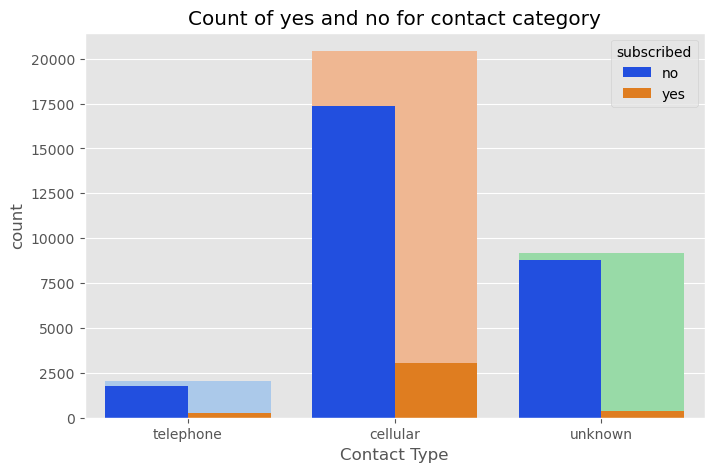

In [65]:
#Lets explore the count of accept and reject term deposit on contact type
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(data.contact, ax=ax, palette='pastel')
sns.countplot(data.contact, hue=data.subscribed,ax=ax, palette='bright')
plt.xlabel('Contact Type')
plt.title('Count of yes and no for contact category')

### Observation - Cellular communication is more effective in comparison to other communication types.

### 9.Months

In [66]:
data['month'].value_counts()

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64

Text(0.5, 1.0, 'Count of yes and no for every month')

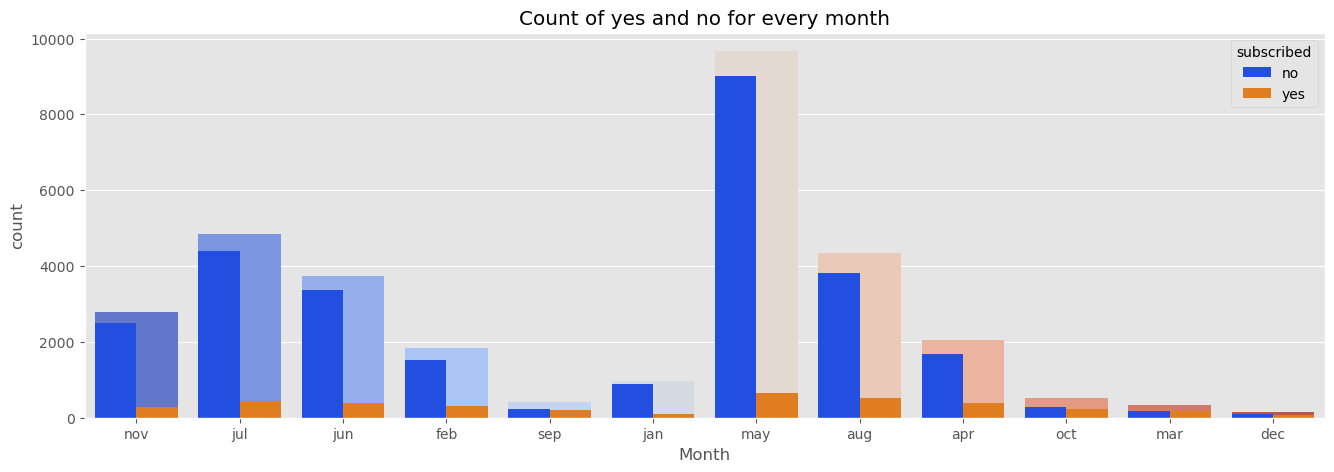

In [67]:
#Lets explore the count of accept and reject term deposit every month
fig, ax = plt.subplots(figsize=(16, 5))
sns.countplot(data.month,palette='coolwarm')
sns.countplot(data.month, hue=data.subscribed,ax=ax, palette='bright')
plt.xlabel('Month')
plt.title('Count of yes and no for every month')

### Observation - There were maximum subscriptions in the month of may.

### 10. Duration

<AxesSubplot:xlabel='subscribed', ylabel='duration'>

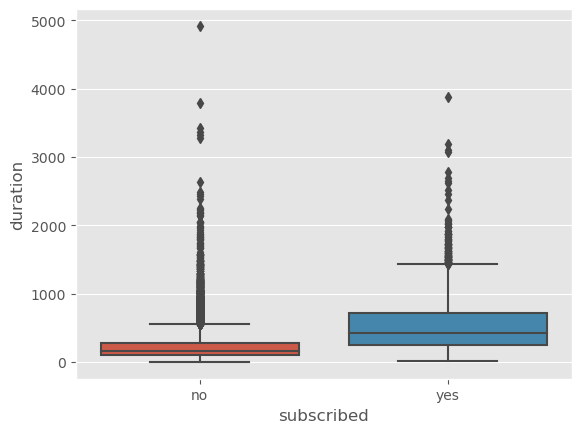

In [69]:
sns.boxplot(y='duration',x="subscribed", data= data)

### Observation - The above box plot shows that calls with large duration has more tendency for conversion

### 11. Campaign

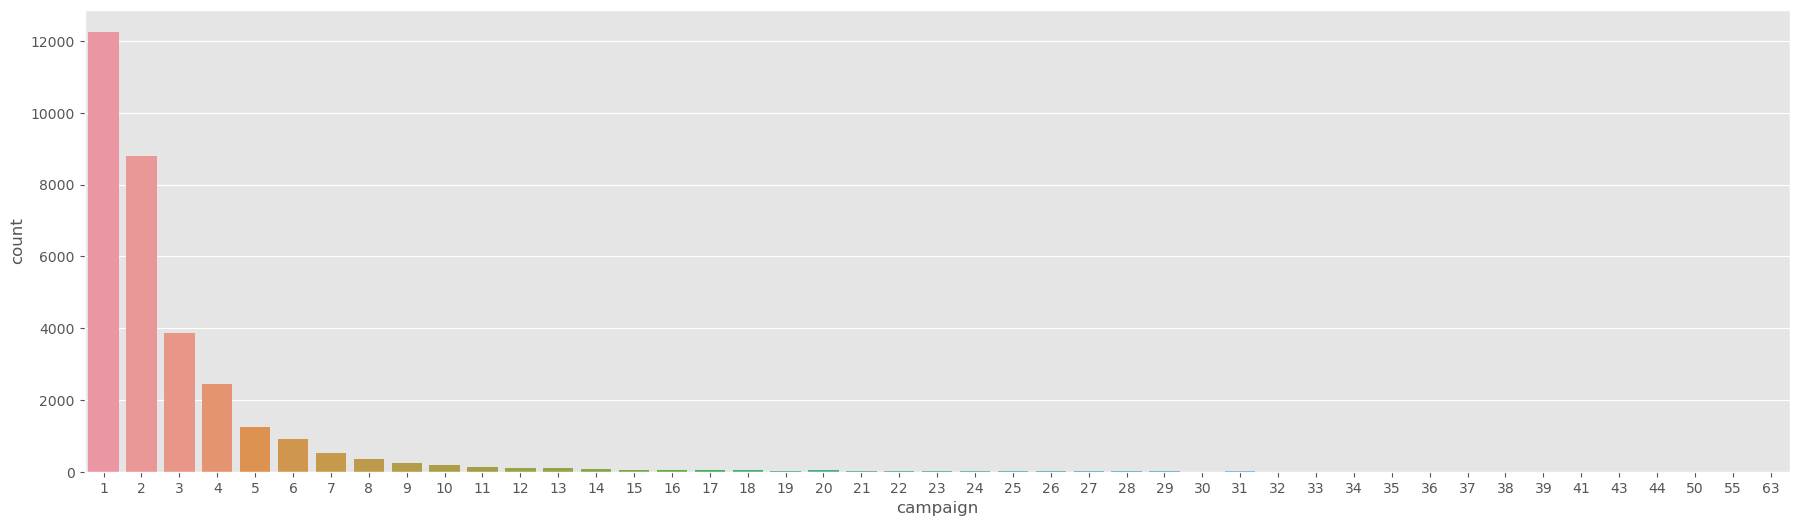

In [70]:
#Countplot of various number of contact were perfomed to how many people
plt.figure(figsize=(22,6))
sns.countplot(data['campaign'])
plt.show()

### Observation - People were mostly contacted once but also some people also connect more number of time.

### 12.Pday

<AxesSubplot:xlabel='subscribed', ylabel='pdays'>

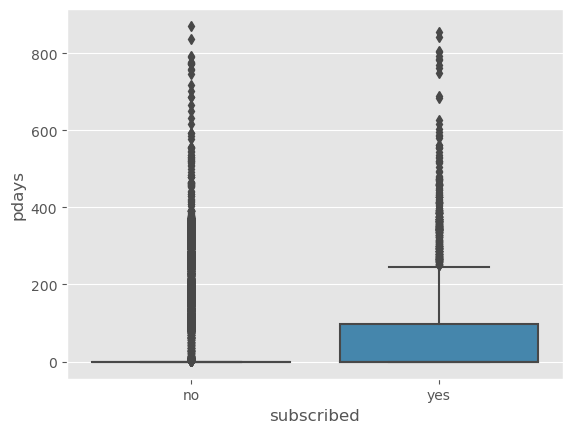

In [71]:
sns.boxplot(y='pdays',x="subscribed", data= data)

### 13. Previous

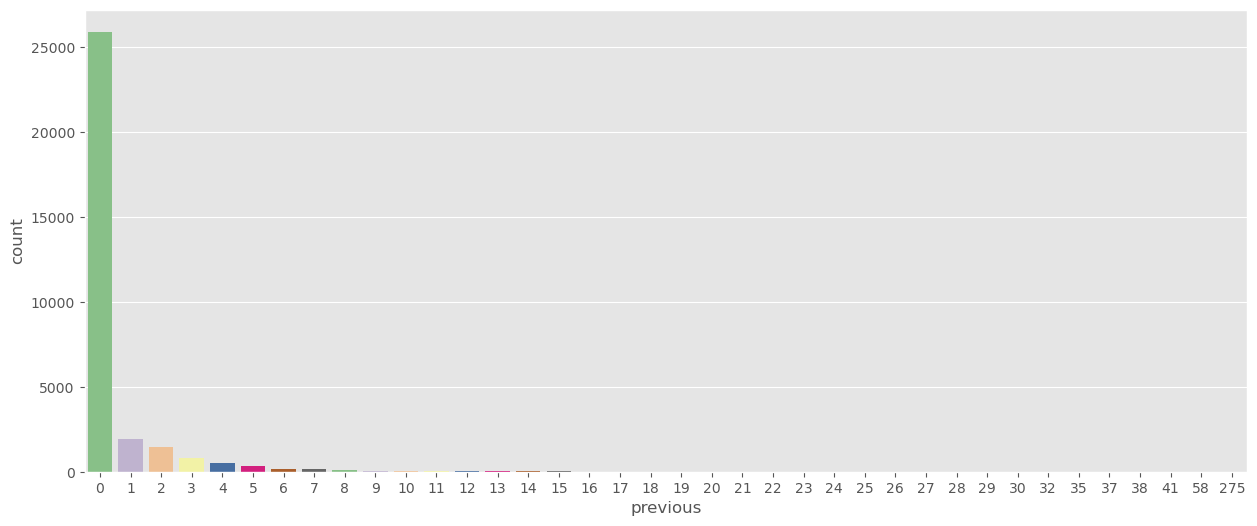

In [72]:
#Ploting countplot of previous feature
plt.figure(figsize=(15,6))
sns.countplot(data['previous'] ,palette="Accent")
plt.show()

### Observation - We can see above that majority of people were not contacted previously before this campaign and there are no significant contacts after 11 times already done.

### 14. Poutcome

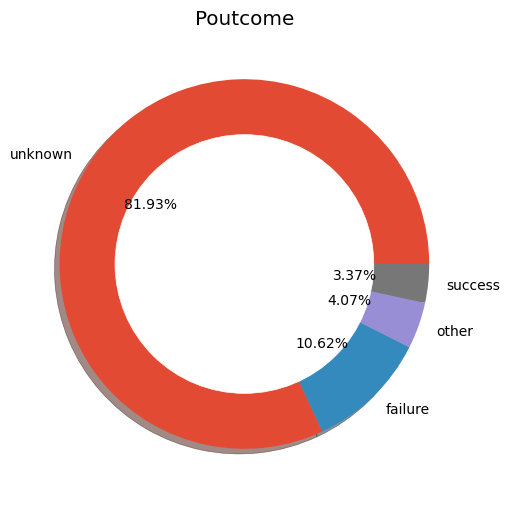

In [73]:
#Lets see pie plot 
plt.figure(figsize=(6,6))
plt.pie(data.poutcome.value_counts(),labels=data.poutcome.value_counts().index,autopct='%1.2f%%',shadow = True)

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Poutcome')
plt.show()

<AxesSubplot:xlabel='poutcome', ylabel='count'>

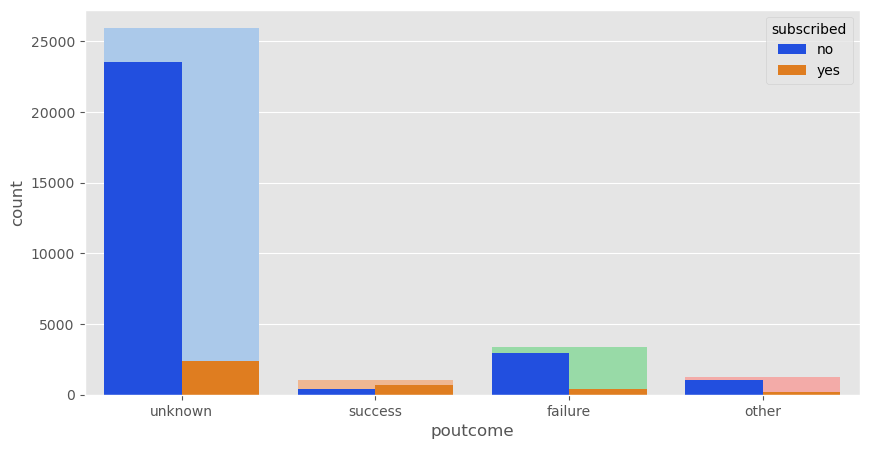

In [75]:
#Lets explore the count of accept and reject term deposit on the basis of poutcome
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data.poutcome, ax=ax, palette='pastel')
sns.countplot(data.poutcome, hue=data.subscribed,ax=ax, palette='bright')

### Observation - Success rate is high for unknown poutcome.

### 15.Subscribed (target variable)

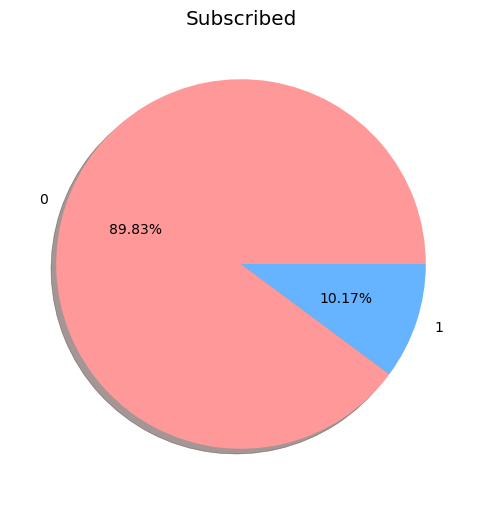

In [112]:
# pie plot 
plt.figure(figsize=(6,6))
colors = ['#ff9999','#66b3ff']
plt.pie(data.subscribed.value_counts(),labels=data.subscribed.value_counts().index,autopct='%1.2f%%',shadow = True,colors = colors)
plt.title('Subscribed')
plt.show()

In [79]:
data['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

<AxesSubplot:xlabel='subscribed', ylabel='count'>

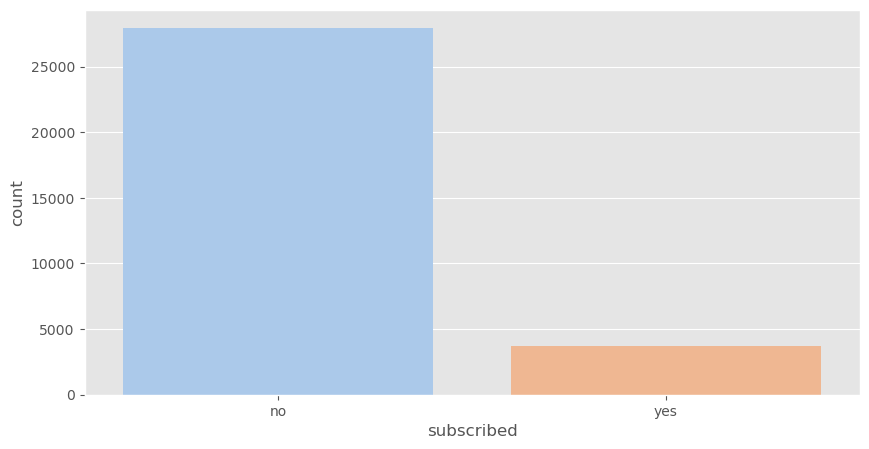

In [80]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data.subscribed, ax=ax, palette='pastel')

### Observation - Only 11.70% client subscribed.

In [82]:
# Convert target variable into numeric
data.subscribed = data.subscribed.map({'no':0, 'yes':1}).astype('uint8')

## Correlation

<AxesSubplot:>

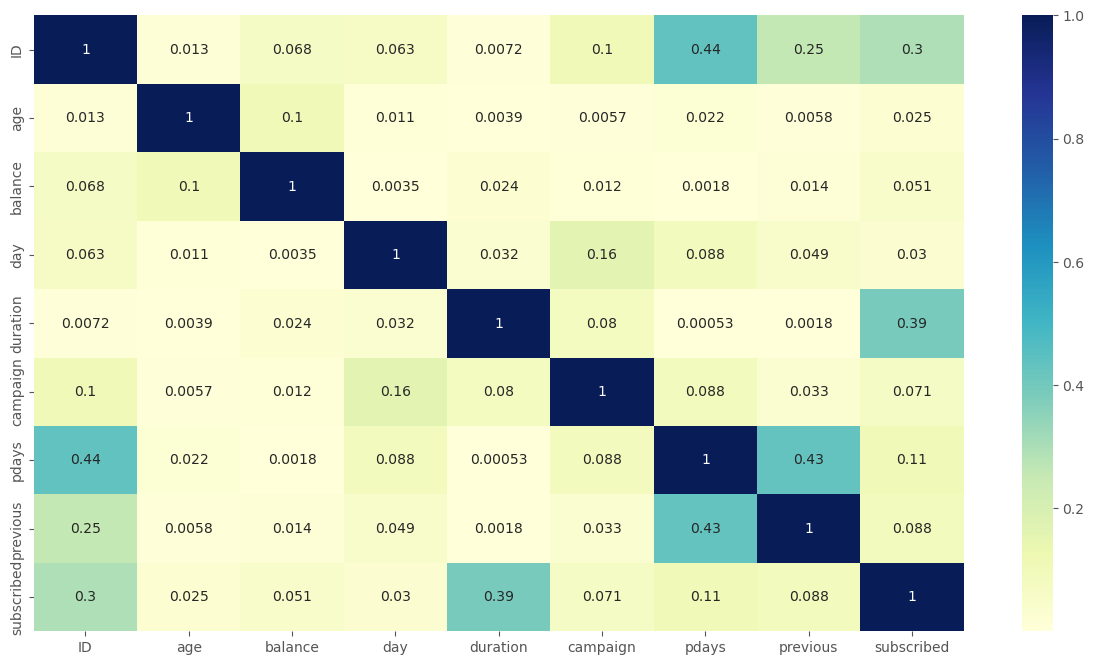

In [83]:
# Plotting correlation matrix
plt.subplots(figsize=(15,8))
sns.heatmap(data.corr().abs(), annot=True,cmap="YlGnBu")

### There is no variable highly correlated to y (Target variable).

In [84]:
#dropping unnescessary column
data.drop(['marital'],axis=1, inplace=True)
data.drop(['contact'],axis=1, inplace=True)
data.head()

ID  age         job  education default  balance housing loan  day month  \
0  26110   56      admin.    unknown      no     1933      no   no   19   nov   
1  40576   31     unknown  secondary      no        3      no   no   20   jul   
2  15320   27    services  secondary      no      891     yes   no   18   jul   
3  43962   57  management   tertiary      no     3287      no   no   22   jun   
4  29842   31  technician  secondary      no      119     yes   no    4   feb   

   duration  campaign  pdays  previous poutcome  subscribed  
0        44         2     -1         0  unknown           0  
1        91         2     -1         0  unknown           0  
2       240         1     -1         0  unknown           0  
3       867         1     84         3  success           1  
4       380         1     -1         0  unknown           0

### Changing categorical variable to numerical variable

In [85]:
data[['default','housing','loan']]=data[['default','housing','loan']].replace(["yes","no"],["1","0"])
data['month']=data['month'].replace(["jan","feb","mar","apr","may","jun","jul", "aug","sep","oct","nov","dec"],["1","2","3","4","5","6","7","8","9","10","11","12"])
data['job']=data['job'].replace(['unknown'],['other'])

data.head()

ID  age         job  education default  balance housing loan  day month  \
0  26110   56      admin.    unknown       0     1933       0    0   19    11   
1  40576   31       other  secondary       0        3       0    0   20     7   
2  15320   27    services  secondary       0      891       1    0   18     7   
3  43962   57  management   tertiary       0     3287       0    0   22     6   
4  29842   31  technician  secondary       0      119       1    0    4     2   

   duration  campaign  pdays  previous poutcome  subscribed  
0        44         2     -1         0  unknown           0  
1        91         2     -1         0  unknown           0  
2       240         1     -1         0  unknown           0  
3       867         1     84         3  success           1  
4       380         1     -1         0  unknown           0

In [86]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['job']=le.fit_transform(data['job'])
data['education']=le.fit_transform(data['education'])
data['poutcome']=le.fit_transform(data['poutcome'])

data.head()

ID  age  job  education default  balance housing loan  day month  \
0  26110   56    0          3       0     1933       0    0   19    11   
1  40576   31    5          1       0        3       0    0   20     7   
2  15320   27    8          1       0      891       1    0   18     7   
3  43962   57    4          2       0     3287       0    0   22     6   
4  29842   31   10          1       0      119       1    0    4     2   

   duration  campaign  pdays  previous  poutcome  subscribed  
0        44         2     -1         0         3           0  
1        91         2     -1         0         3           0  
2       240         1     -1         0         3           0  
3       867         1     84         3         2           1  
4       380         1     -1         0         3           0

## Outlier Treatment

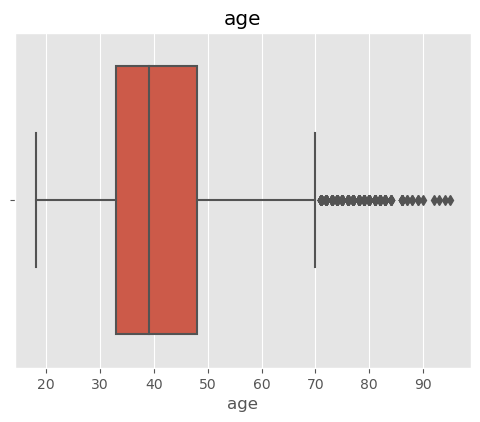

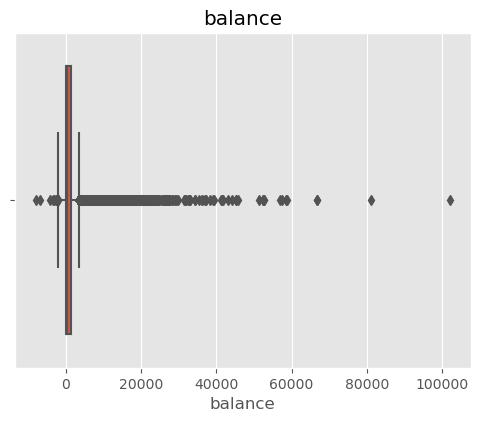

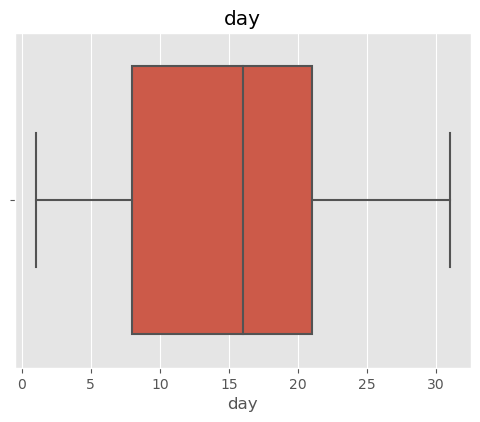

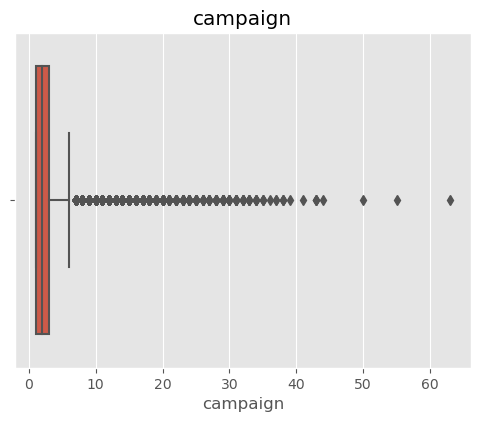

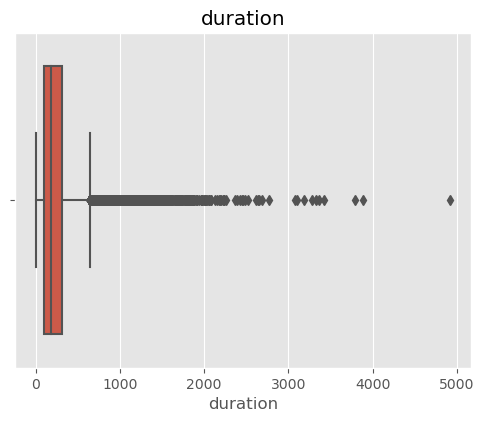

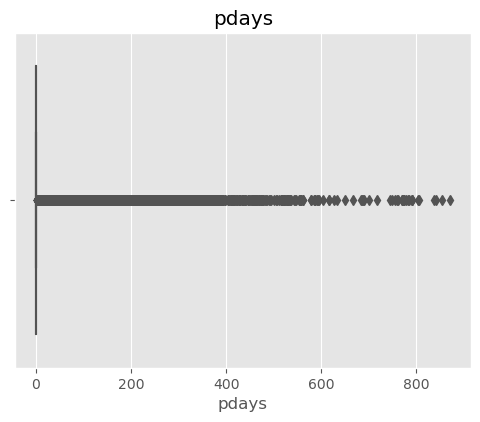

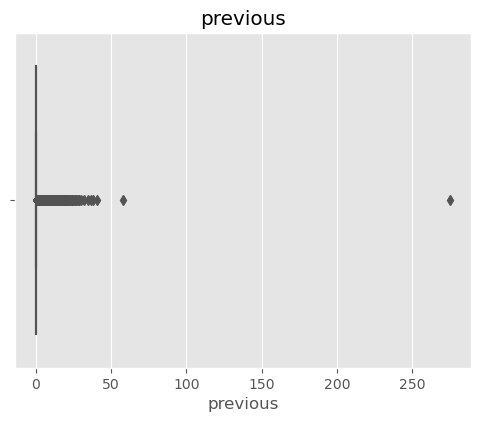

In [87]:
col=data[['age','balance','day','campaign','duration','pdays','previous']]
for i in col:
  n=1
  plt.figure(figsize=(20,20))
  plt.subplot(4,3,1)
  sns.boxplot(data[i])
  plt.title(i)
  plt.show()
  n=n+1

## Using Z score for outlier treatment

In [88]:
from scipy import stats
z = np.abs(stats.zscore(data[['age','balance','duration','campaign','pdays','previous']]))
print(z)
data=data[(z<3).all(axis=1)]
data.shape

            age    balance   duration   campaign     pdays    previous
0      1.415793   0.187933   0.832754   0.245906  0.408555    0.237059
1      0.937156   0.449397   0.649957   0.245906  0.408555    0.237059
2      1.313627   0.156159   0.070449   0.567059  0.408555    0.237059
3      1.509911   0.635055   2.368149   0.567059  0.447299    1.001336
4      0.937156   0.411091   0.474054   0.567059  0.408555    0.237059
5      0.748920   0.450388   0.552724   0.075247  0.408555    0.237059
6      1.415793   0.105635   0.369043   0.245906  0.408555    0.237059
7      0.851085   0.147646   0.626621   0.396400  0.408555    0.237059
8      0.380496   0.193877   1.687520   0.567059  0.408555    0.237059
9      0.560684   0.052799   2.064783   0.245906  0.408555    0.237059
10     0.466566   0.450388   1.668073   1.359859  0.408555    0.237059
11     0.560684   0.500252   0.630510   0.245906  0.408555    0.237059
12     0.286378   0.372125   0.179350   0.245906  0.408555    0.237059
13    

(28124, 16)

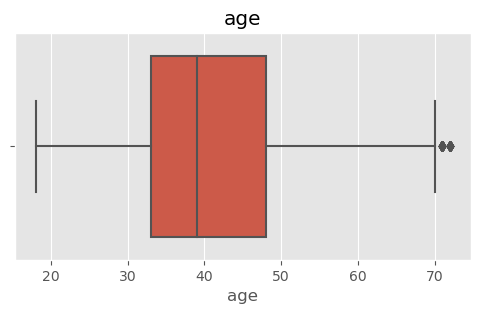

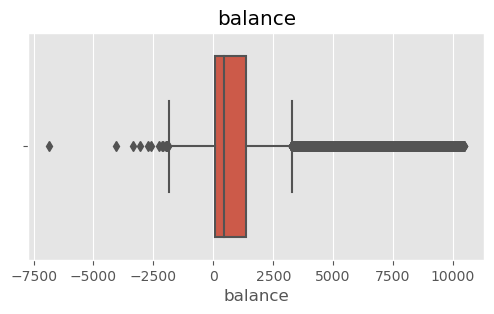

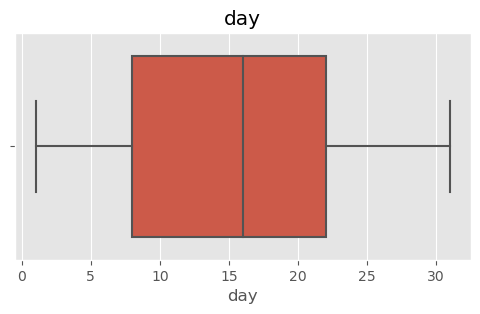

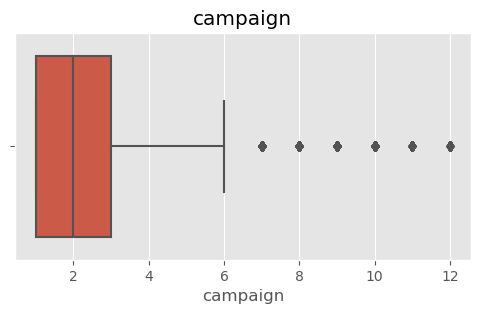

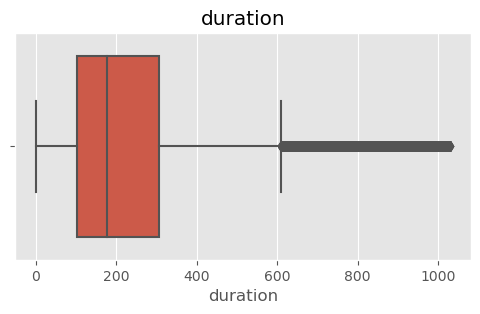

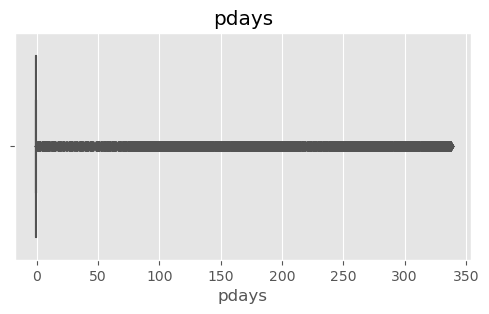

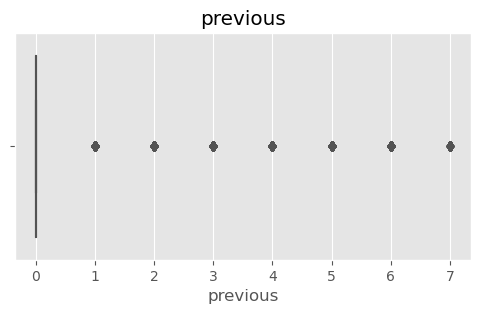

In [89]:
#checking outliers removed ot not
for i in col:
  plt.figure(figsize=(20,10))
  plt.subplot(3,3,1)
  sns.boxplot(data[i])
  plt.title(i)
plt.show()

## Prepairing Dataset for Modeling

In [91]:
#contain all  independent variabl
x=data.drop(['subscribed'],axis=1)

#dependent variable
y=data['subscribed']         

### Handling Inbalance data

0    25264
1     2860
Name: subscribed, dtype: int64


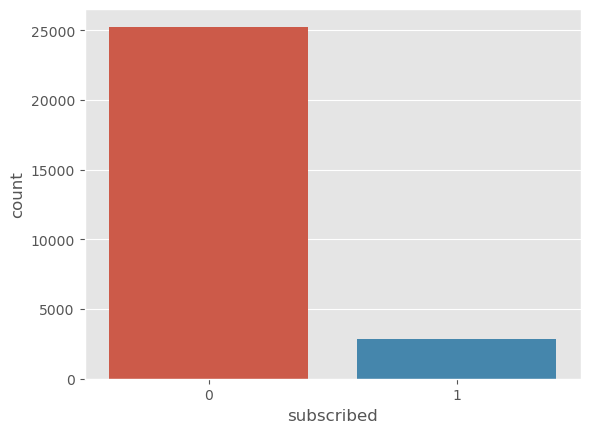

In [93]:
sns.countplot(x='subscribed',data=data)
print(data['subscribed'].value_counts())

In [94]:
# Using random over sampling
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler()
x_new,y_new=os.fit_resample(x,y)

<AxesSubplot:xlabel='subscribed', ylabel='count'>

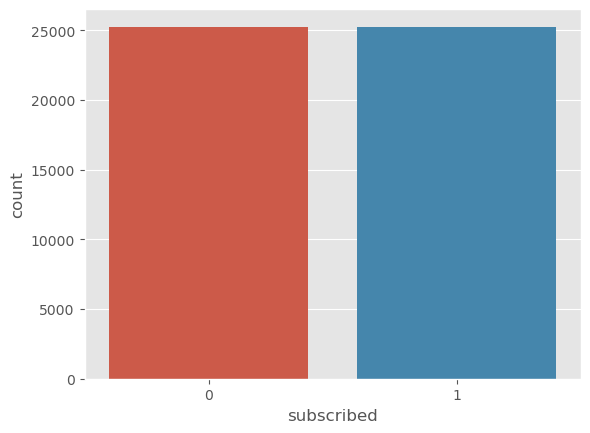

In [95]:
sns.countplot(y_new)

In [96]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))

Original dataset shape Counter({0: 25264, 1: 2860})
Resampled dataset shape Counter({0: 25264, 1: 25264})


## Model

In [97]:
#loading required libraries 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score
from sklearn.model_selection import cross_val_score,ShuffleSplit,cross_val_predict
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score, roc_curve, log_loss

In [98]:
#dividing the dataset into training and testing
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=.3,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(35369, 15) (15159, 15) (35369,) (15159,)


In [99]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [100]:
# Lets define a function for Evaluation metrics 
def print_metrics(actual,prediction,model=''):
  print(f'{model} Test accuracy Score', accuracy_score(actual,prediction))
  print(classification_report(actual,prediction))
  
  return confusion_matrix(actual,prediction)

### 1.Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 4000)
lr.fit(x_train,y_train)
cv_score = cross_val_score(lr,x_train,y_train,cv=5)

y_pred_lr=lr.predict(x_test)

print('Cross_validation score',cv_score)
print_metrics(y_test,y_pred_lr,'LogisticRegression')

Cross_validation score [0.83517105 0.83630195 0.83983602 0.83672604 0.83613742]
LogisticRegression Test accuracy Score 0.843723200738835
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      7572
           1       0.83      0.86      0.85      7587

    accuracy                           0.84     15159
   macro avg       0.84      0.84      0.84     15159
weighted avg       0.84      0.84      0.84     15159



array([[6276, 1296],
       [1073, 6514]], dtype=int64)

### 2.Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier

rf_reg = RandomForestClassifier(max_depth = 8, n_estimators = 200)
rf_reg.fit(x_train,y_train)
cv_score = cross_val_score(rf_reg,x_train,y_train,cv=5)

y_pred_rf=rf_reg.predict(x_test)

print('Cross_validation score',cv_score)
print_metrics(y_test,y_pred_rf,'RandomForest')

Cross_validation score [0.89977382 0.89765338 0.89850155 0.89623975 0.90400113]
RandomForest Test accuracy Score 0.9038195131604987
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      7572
           1       0.87      0.95      0.91      7587

    accuracy                           0.90     15159
   macro avg       0.91      0.90      0.90     15159
weighted avg       0.91      0.90      0.90     15159



array([[6469, 1103],
       [ 355, 7232]], dtype=int64)

### 3.KNN

In [103]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
cv_score = cross_val_score(knn,x_train,y_train,cv=5)

y_pred_knn=knn.predict(x_test)

print('Cross_validation score',cv_score)
print_metrics(y_test,y_pred_knn,'KNN')

Cross_validation score [0.9040147  0.90839695 0.90613514 0.9051456  0.90810123]
KNN Test accuracy Score 0.9210370077181872
              precision    recall  f1-score   support

           0       0.99      0.85      0.92      7572
           1       0.87      0.99      0.93      7587

    accuracy                           0.92     15159
   macro avg       0.93      0.92      0.92     15159
weighted avg       0.93      0.92      0.92     15159



array([[6456, 1116],
       [  81, 7506]], dtype=int64)

### 4.SVC

In [104]:
from sklearn.svm import SVC

svc = SVC(random_state=0)

svc.fit(x_train,y_train)
cv_score = cross_val_score(svc,x_train,y_train,cv=5)

y_pred_svc = svc.predict(x_test)

print('Cross_validation score',cv_score)
print_metrics(y_test,y_pred_svc,'SVC')

Cross_validation score [0.87574215 0.87461125 0.87814532 0.87772123 0.88024883]
SVC Test accuracy Score 0.8835675176462827
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      7572
           1       0.85      0.94      0.89      7587

    accuracy                           0.88     15159
   macro avg       0.89      0.88      0.88     15159
weighted avg       0.89      0.88      0.88     15159



array([[6293, 1279],
       [ 486, 7101]], dtype=int64)

### 5.LGBM

In [106]:
#loading libraries
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate=0.1, max_depth= 25, n_estimators= 50)

lgbm.fit(x_train,y_train)
cv_score = cross_val_score(lgbm,x_train,y_train,cv=5)

y_pred_lgbm = lgbm.predict(x_test)

print('Cross_validation score',cv_score)
print_metrics(y_test,y_pred_lgbm,'LGBM')

Cross_validation score [0.90712468 0.91080011 0.9123551  0.90924512 0.90951506]
LGBM Test accuracy Score 0.9119994722607032
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      7572
           1       0.87      0.97      0.92      7587

    accuracy                           0.91     15159
   macro avg       0.92      0.91      0.91     15159
weighted avg       0.92      0.91      0.91     15159



array([[6500, 1072],
       [ 262, 7325]], dtype=int64)

**************************************************
Train AUC: 0.965
Test AUC: 0.960
**************************************************
Train Accuracy: 0.917
Test Accuracy: 0.912


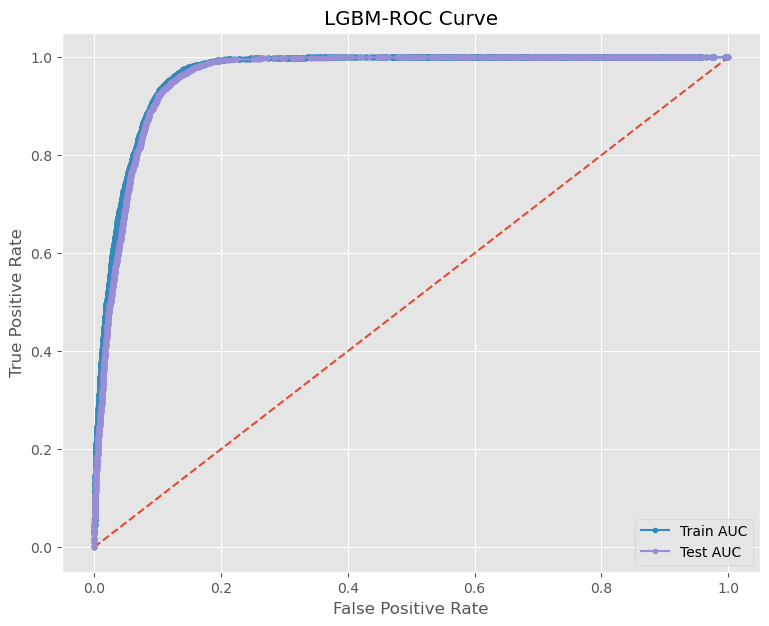

In [107]:
y_probs_train = lgbm.predict_proba(x_train)
y_probs_test = lgbm.predict_proba(x_test)
y_predicted_train = lgbm.predict(x_train)
y_predicted_test = lgbm.predict(x_test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
plt.figure(figsize=(9,7))
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
f1_s=f1_score(y_test,y_predicted_test)
p_score=precision_score(y_test,y_predicted_test)

print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

#score['KNN (Over sampling)'] = [test_auc, test_acc,f1_s,p_score]

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("LGBM-ROC Curve")
plt.show()

### Hyperparameter Tunning of LGBM

In [108]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,ShuffleSplit
lgbm_wt = LGBMClassifier(learning_rate=0.1, max_depth= 5, n_estimators= 150)


parameters=[{'learning_rate': [0.05, 0.1, 0.2 ,0.3 ,0.4], 'max_depth': range(3,8), 'n_estimators': range(30, 150, 10)}] 

lgbm_grid=RandomizedSearchCV(lgbm_wt,parameters,scoring='precision',cv=5,verbose=2)

lgbm_grid.fit(x_train,y_train)

y_pred_lgbm=lgbm_grid.predict(x_test)

print('Cross_validation score',cv_score)
print_metrics(y_test,y_pred_lgbm,'LGBM_Hypertunning')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=110; total time=   0.6s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=110; total time=   0.5s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=110; total time=   0.6s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=110; total time=   0.7s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=110; total time=   0.6s
[CV] END ...learning_rate=0.05, max_depth=3, n_estimators=60; total time=   0.3s
[CV] END ...learning_rate=0.05, max_depth=3, n_estimators=60; total time=   0.3s
[CV] END ...learning_rate=0.05, max_depth=3, n_estimators=60; total time=   0.7s
[CV] END ...learning_rate=0.05, max_depth=3, n_estimators=60; total time=   0.5s
[CV] END ...learning_rate=0.05, max_depth=3, n_estimators=60; total time=   0.2s
[CV] END ....learning_rate=0.3, max_depth=7, n_estimators=30; total time=   0.5s
[CV] END ....learning_rate=0.3, max_depth=7, n_e

array([[6816,  756],
       [  84, 7503]], dtype=int64)

### Comparing Models

In [110]:
from prettytable import PrettyTable

In [111]:
print('**** Comparison of  models for Class 1(Yes)  (oversampled train data)  ****')
table = PrettyTable(['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1_score'])
table.add_row(['Logistic regression', 0.7921, 0.81, 0.77, 0.79])
table.add_row(['Random Forest', 0.8597, 0.84, 0.88, 0.86])
table.add_row(['KNN', 0.9264, 0.87, 0.98, 0.92])
table.add_row(['SVC', 0.8493, 0.83, 0.87, 0.85])
table.add_row(['LGBM', 0.8723, 0.86, 0.90, 0.88])
table.add_row(['LGBM (Hyperparameter Tunned)', 0.9293, 0.90, 0.95, 0.92])


print(table)

**** Comparison of  models for Class 1(Yes)  (oversampled train data)  ****
+------------------------------+---------------+-----------+--------+----------+
|            Model             | Test Accuracy | Precision | Recall | F1_score |
+------------------------------+---------------+-----------+--------+----------+
|     Logistic regression      |     0.7921    |    0.81   |  0.77  |   0.79   |
|        Random Forest         |     0.8597    |    0.84   |  0.88  |   0.86   |
|             KNN              |     0.9264    |    0.87   |  0.98  |   0.92   |
|             SVC              |     0.8493    |    0.83   |  0.87  |   0.85   |
|             LGBM             |     0.8723    |    0.86   |  0.9   |   0.88   |
| LGBM (Hyperparameter Tunned) |     0.9293    |    0.9    |  0.95  |   0.92   |
+------------------------------+---------------+-----------+--------+----------+


### Thus, we can conclude that Light GBM and KNN is showing the best score among them.

## Conclusion

Majority of the people have home loan but only few of them opted for term subscribed.

People were mostly contacted only once.